In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib notebook


## IMPORTING DATASET

In [276]:
wine = datasets.load_wine()


In [277]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [278]:
data =pd.DataFrame(wine['data'],columns=wine['feature_names'])
data['target']= wine['target']
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [279]:
data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [281]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [282]:
data.shape


(178, 14)

## TRAIN TEST SPLIT OF DATA

In [283]:
X = data
y = X.pop('target')




In [284]:
X.shape

(178, 13)

In [285]:
y.shape

(178,)

In [286]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [287]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [288]:
y.unique() #these are the unique categories of wine



array([0, 1, 2])

In [289]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=55)

## Train Classifier

In [290]:
model = KNeighborsClassifier(n_neighbors=3)

In [291]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [292]:
model.score(X_test,y_test)

0.8333333333333334

In [293]:
## getting the best value for n_neighbors

In [294]:
k_range= range(1,25)
scores= [ ]

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))

In [295]:
scores

[0.75,
 0.6944444444444444,
 0.8333333333333334,
 0.6388888888888888,
 0.6388888888888888,
 0.6111111111111112,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666]

<IPython.core.display.Javascript object>


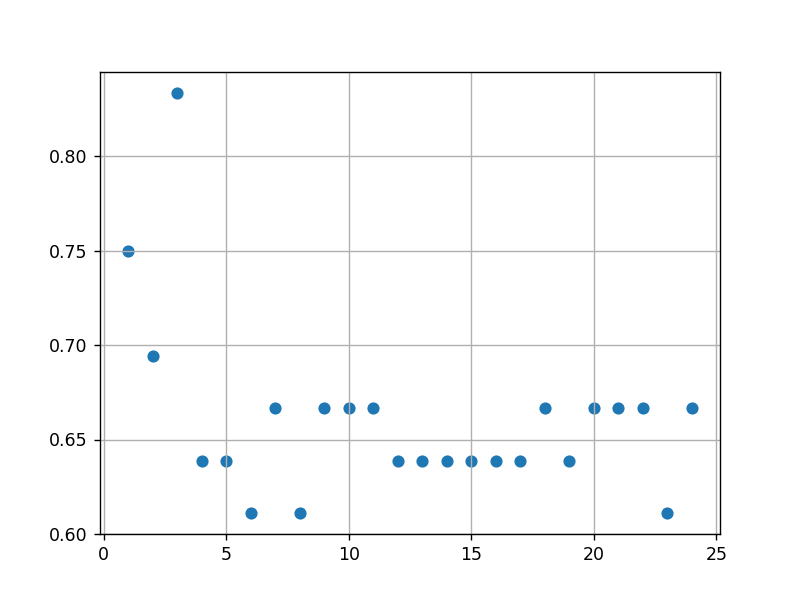

In [297]:
plt.figure()
plt.scatter(k_range,scores)
plt.xlabel=('K_score')
plt.ylabel=('Accuracy')
plt.xticks=[0,5,10,15,20,25,30]
plt.grid()
plt.show()

In [ ]:
# the best for K=3

<IPython.core.display.Javascript object>


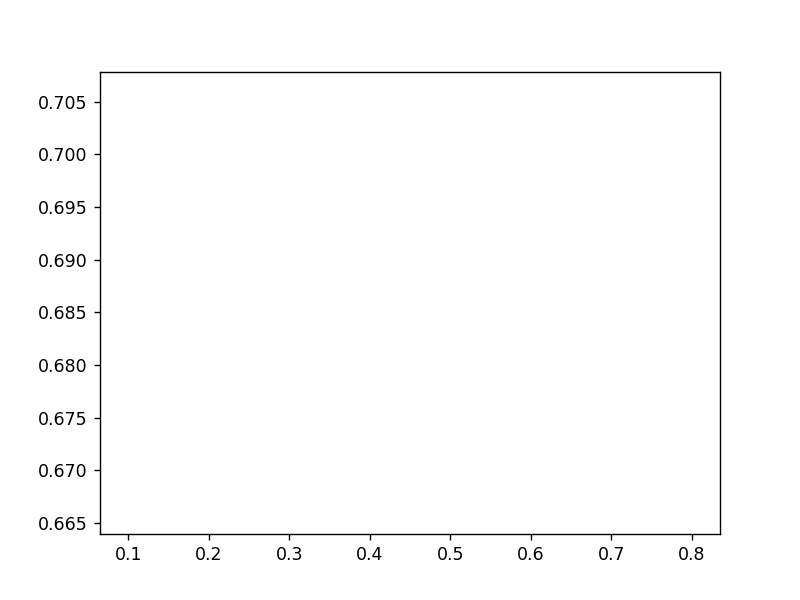

In [298]:
test_sizes=[0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

model = KNeighborsClassifier(n_neighbors=3)

plt.figure()

for test_size in test_sizes:
    scores =[]
    for i in range(1,1000):
        X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 1-test_size)
        model.fit(X_train,y_train)
        scores.append(model.score(X_test,y_test))
    plt.plot(test_size, np.mean(scores))
plt.xlabel=('Training split %')
plt.ylabel=('Accuracy')

## MAKE PREDICTIONS

In [299]:
predictions= model.predict(X_test)

In [301]:
predictions

array([0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2,
       1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 1, 0, 0, 0, 0, 1])

In [256]:
y_test

16     0
38     0
125    1
36     0
120    1
      ..
23     0
133    2
14     0
5      0
102    1
Name: target, Length: 161, dtype: int32

In [303]:
cm = confusion_matrix(y_test, predictions)

In [304]:
cm

array([[51,  1,  0],
       [ 8, 34, 23],
       [12, 18, 14]], dtype=int64)

<IPython.core.display.Javascript object>


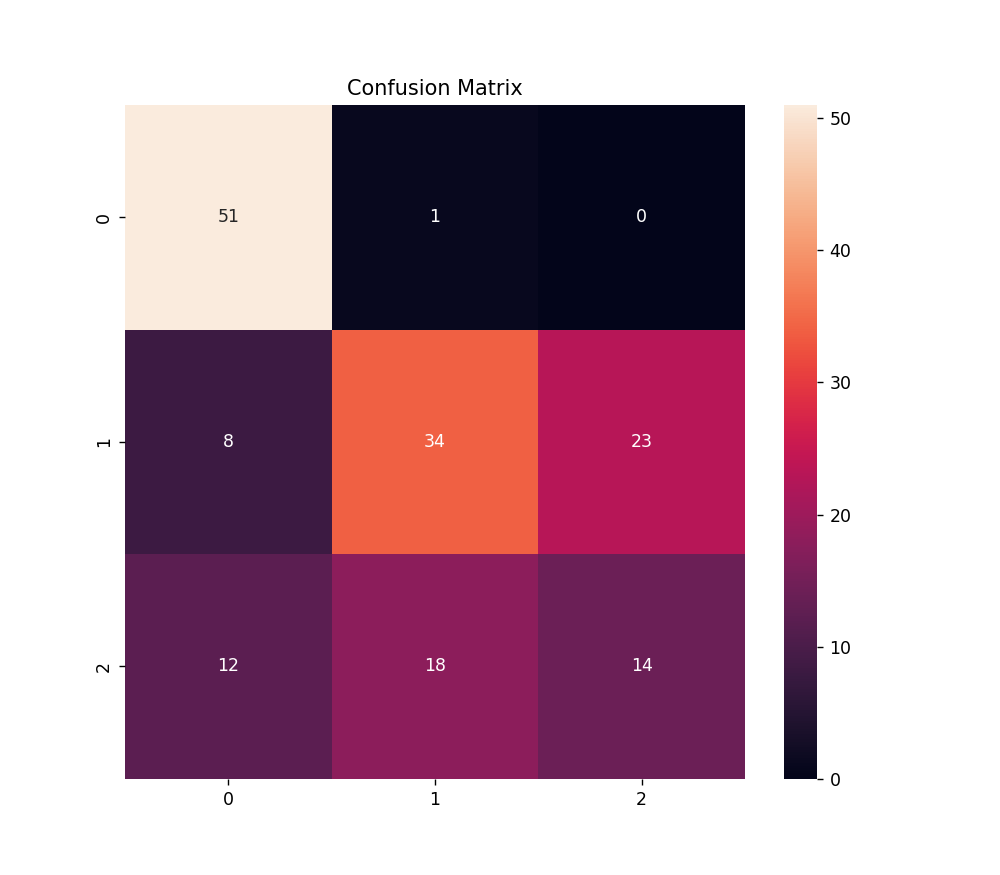

TypeError: 'str' object is not callable

In [313]:
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.ylabel("sach")
plt.xlabel("predictions")